In [1]:
import requests
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from cdcp.paths import DATA_DIR, ensure_dir

### load atlas to get depth relative to brain surface

In [3]:
from birdbrain.atlas import atlas
from birdbrain.utils import um_to_vox, vox_to_um
from birdbrain.visualization.plots_2d.plot_2d_coordinates import plot_2d_coordinates
from birdbrain.paths import  PROJECT_DIR
import matplotlib.pyplot as plt
from pathlib2 import Path
%matplotlib inline

/mnt/cube/tsainbur/Projects/github_repos/birdbrain/birdbrain/utils.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
# where to look for the dataset
dset_dir = PROJECT_DIR / 'birdbrain'/ 'data' / 'processed' / 'starling'
# create the atlas
starling_atlas = atlas(
    species = 'starling',
    dset_dir = dset_dir,
    um_mult = 100,
    smoothing = ['Brain', 'Nuclei', 'Brainregions'],
    updated_y_sinus = [100, 1600, 0]
)

/home/AD/tsainbur/anaconda3/envs/cdcp_paper/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
qform_code 32 not valid; setting to 0
qform_code 32 not valid; setting to 0


Data already download
Loading brain labels...
Getting voxel data from .img files...


qform_code 32 not valid; setting to 0
qform_code 32 not valid; setting to 0
/home/AD/tsainbur/anaconda3/envs/cdcp_paper/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


smoothing:   0%|          | 0/1 [00:00<?, ?it/s]

smoothing:   0%|          | 0/22 [00:00<?, ?it/s]

smoothing:   0%|          | 0/11 [00:00<?, ?it/s]

Getting location for each nucleus/region from voxel data...


/mnt/cube/tsainbur/Projects/github_repos/birdbrain/birdbrain/atlas.py:120: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("tab20"))
  self.label_cmap.set_under(color=(0, 0, 0, 0))
/mnt/cube/tsainbur/Projects/github_repos/birdbrain/birdbrain/atlas.py:127: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greys"))
  self.img_cmap.set_under(color=(0, 0, 0, 0))


finding region:   0%|          | 0/45 [00:00<?, ?it/s]

Atlas created


In [5]:
import seaborn as sns

In [6]:
nuclei_to_plot = ['NCM',  'Field_L', 'CMM', "Nidopallium",]#['Field_L', 'NCM', 'CMM']
nuclei_cmap = sns.color_palette('Set1', len(nuclei_to_plot))

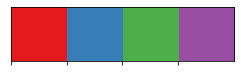

In [7]:
sns.palplot(nuclei_cmap)

In [8]:
regions_plotted = starling_atlas.brain_labels.loc[nuclei_to_plot]
regions_plotted['colors'] = list(nuclei_cmap)

In [9]:
regions_plotted

,label,region,type_,colors
region,,,,
NCM,2,NCM,Nuclei,"(0.8941176470588236, 0.10196078431372549, 0.10..."
Field_L,1,Field_L,Nuclei,"(0.21568627450980393, 0.49411764705882355, 0.7..."
CMM,5,CMM,Nuclei,"(0.30196078431372547, 0.6862745098039216, 0.29..."
Nidopallium,1,Nidopallium,Brainregions,"(0.596078431372549, 0.3058823529411765, 0.6392..."


In [10]:
color_dict = {row.region:row.colors for idx, row in regions_plotted.iterrows()}

In [11]:
# create dictionary of voxel locations for nuclei
voxels_nuclei = starling_atlas.voxel_data.loc['Nuclei', 'voxels']
voxels_brainregions = starling_atlas.voxel_data.loc['Brainregions', 'voxels']
vox_dict = {}
for ri, region_row in regions_plotted.iterrows():
    if region_row.type_ == 'Nuclei':
        region_voxels = np.array(np.where(voxels_nuclei == region_row.label))
    elif region_row.type_ == "Brainregions":
        region_voxels = np.array(np.where(voxels_brainregions == region_row.label))
    print(region_voxels.shape)
    vox_dict[region_row.region] = region_voxels

(3, 26881)
(3, 10515)
(3, 6337)
(3, 792729)


In [12]:
from tqdm.autonotebook import tqdm

In [13]:
# convert voxel dict to um
um_dict = {key:np.vstack([vox_to_um(
    i,
    starling_atlas.voxel_data.loc["Brain", "affine"],
    starling_atlas.um_mult,
    starling_atlas.y_sinus_um_transform,
) for i in tqdm(values.T, leave=False)]) for key, values in tqdm(vox_dict.items())}

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/26881 [00:00<?, ?it/s]

  0%|          | 0/10515 [00:00<?, ?it/s]

  0%|          | 0/6337 [00:00<?, ?it/s]

  0%|          | 0/792729 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

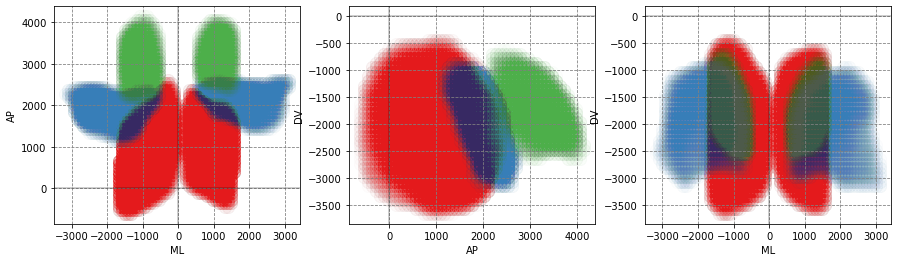

In [14]:
axis_names = ["ML", "AP", "DV"]
fig, axs = plt.subplots(ncols=3, figsize=(15,4))
for axi, (i, j) in enumerate(tqdm([[0,1], [1,2], [0,2]])):
    ax = axs[axi]
    for region, region_voxels in um_dict.items():
        if region == "Nidopallium":
            continue
        ax.scatter(region_voxels[:,i], region_voxels[:,j], s = 150, color = color_dict[region], alpha = 0.01)
    ax.axvline(0, color = 'k', alpha = 0.25)
    ax.axhline(0, color = 'k', alpha = 0.25)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.set_xlabel(axis_names[i])
    ax.set_ylabel(axis_names[j])

In [15]:
um_dict["Nidopallium"].shape

(792729, 3)

In [16]:
# Mask NCL to be lateral of NCM
NCM_ML_min = np.min(um_dict["NCM"][:,0])
NCM_ML_max = np.max(um_dict["NCM"][:,0])
NCM_AP_max = np.max(um_dict["NCM"][np.abs(um_dict["NCM"][:,0]) > 1000][:,1])

nidopallium_mask = (
    (um_dict["Nidopallium"][:, 0] < NCM_ML_min)
    | (um_dict["Nidopallium"][:, 0] > NCM_ML_max)
) & (um_dict["Nidopallium"][:, 1] < NCM_AP_max)
um_dict["Nidopallium"] = um_dict["Nidopallium"][nidopallium_mask]

In [17]:
import scipy.spatial
def point_in_hull(point, hull, tolerance=1e-12):
    return all(
        (np.dot(eq[:-1], point) + eq[-1] <= tolerance)
        for eq in hull.equations)

In [18]:
# NCL does not lie above NCM
L_chull = scipy.spatial.ConvexHull(um_dict["Field_L"][:,(0,1)])
L_mask = np.array([point_in_hull(i, L_chull) == False for i in tqdm(um_dict["Nidopallium"][:,(0,1)])])
um_dict["Nidopallium"] = um_dict["Nidopallium"][L_mask]

  0%|          | 0/476251 [00:00<?, ?it/s]

In [19]:
# NCL does not lie above NCM
L_chull = scipy.spatial.ConvexHull(um_dict["CMM"][:,(0,1)])
L_mask = np.array([point_in_hull(i, L_chull) == False for i in tqdm(um_dict["Nidopallium"][:,(0,1)])])
um_dict["Nidopallium"] = um_dict["Nidopallium"][L_mask]

  0%|          | 0/466169 [00:00<?, ?it/s]

In [20]:
um_dict["NCL"] = um_dict["Nidopallium"]
um_dict.pop("Nidopallium");

In [21]:
um_dict.keys()

dict_keys(['NCM', 'Field_L', 'CMM', 'NCL'])

In [22]:
color_dict['NCL'] = color_dict['Nidopallium']

  0%|          | 0/3 [00:00<?, ?it/s]

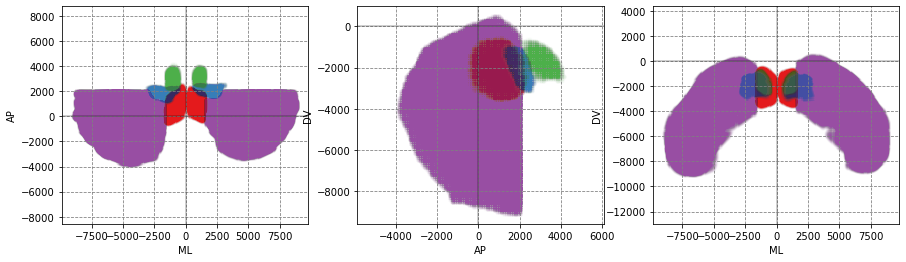

In [23]:
axis_names = ["ML", "AP", "DV"]
fig, axs = plt.subplots(ncols=3, figsize=(15,4))
for axi, (i, j) in enumerate(tqdm([[0,1], [1,2], [0,2]])):
    ax = axs[axi]
    for region, region_voxels in um_dict.items():
        if region == ["Nidopallium"]:
            continue
        ax.scatter(region_voxels[:,i], region_voxels[:,j], s = 10, color = color_dict[region], alpha = 0.01)
    ax.axvline(0, color = 'k', alpha = 0.25)
    ax.axhline(0, color = 'k', alpha = 0.25)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.set_xlabel(axis_names[i])
    ax.set_ylabel(axis_names[j])
    ax.axis('equal')

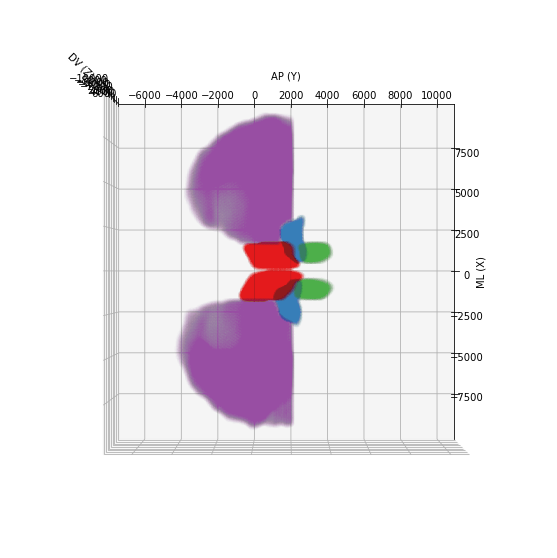

In [24]:
sr = 1
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
for region, region_voxels in um_dict.items():
    if region == "Nidopallium":
        continue
    if region == "NCL":
        sr = 5
    else:
        sr=1
    ax.scatter(
        region_voxels[:, 0][::sr],
        region_voxels[:, 1][::sr],
        region_voxels[:, 2][::sr],
        s=20,
        color=color_dict[region],
        alpha=.01,
    )

ax.set_xlabel("ML (X)")
ax.set_ylabel("AP (Y)")
ax.set_zlabel("DV (Z)")

z_range = [-3500, 500]
x_range = [-8000, 8000]
y_range = [-1500, 5000]

# Create cubic bounding box to simulate equal aspect ratio
max_range = np.array(
    [x_range[1] - x_range[0], y_range[1] - y_range[0], z_range[1] - z_range[0]]
).max()
Xb = 0.5 * max_range * np.mgrid[-1:2:2, -1:2:2, -1:2:2][0].flatten() + 0.5 * (
    np.sum(x_range)
)
Yb = 0.5 * max_range * np.mgrid[-1:2:2, -1:2:2, -1:2:2][1].flatten() + 0.5 * (
    np.sum(y_range)
)
Zb = 0.5 * max_range * np.mgrid[-1:2:2, -1:2:2, -1:2:2][2].flatten() + 0.5 * (
    np.sum(z_range)
)
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax.plot([xb], [yb], [zb], "w")
    
ax.view_init(elev=-90, azim=0)
plt.show()

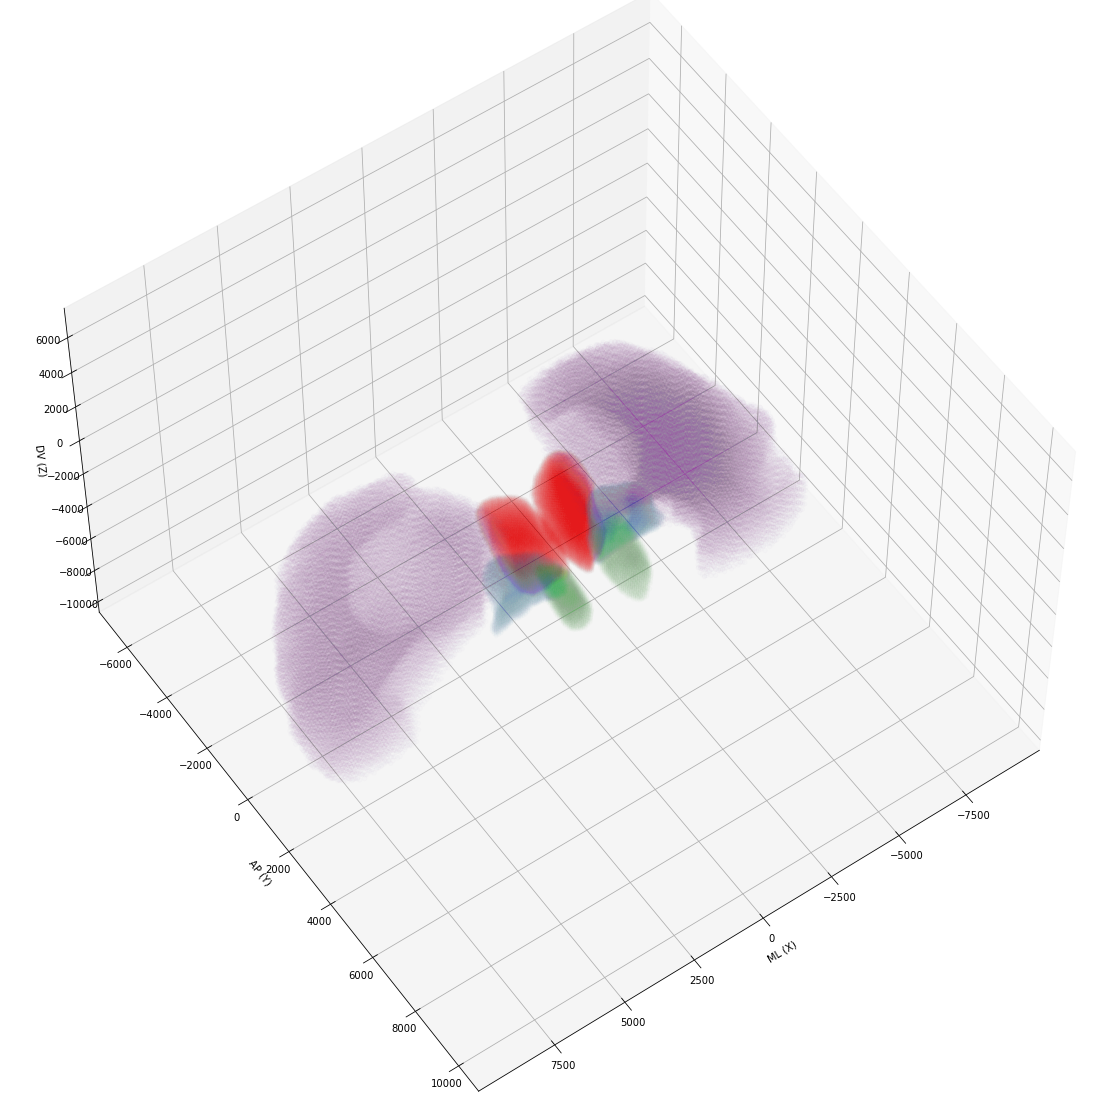

In [25]:
sr = 1
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection="3d")
for region, region_voxels in um_dict.items():
    if region == "Nidopallium":
        continue
    if region == "NCL":
        sr = 5
    else:
        sr=1
    ax.scatter(
        region_voxels[:, 0][::sr],
        region_voxels[:, 1][::sr],
        region_voxels[:, 2][::sr],
        s=20,
        color=color_dict[region],
        alpha=0.01,
    )

ax.set_xlabel("ML (X)")
ax.set_ylabel("AP (Y)")
ax.set_zlabel("DV (Z)")

z_range = [-3500, 500]
x_range = [-8000, 8000]
y_range = [-1500, 5000]

# Create cubic bounding box to simulate equal aspect ratio
max_range = np.array(
    [x_range[1] - x_range[0], y_range[1] - y_range[0], z_range[1] - z_range[0]]
).max()
Xb = 0.5 * max_range * np.mgrid[-1:2:2, -1:2:2, -1:2:2][0].flatten() + 0.5 * (
    np.sum(x_range)
)
Yb = 0.5 * max_range * np.mgrid[-1:2:2, -1:2:2, -1:2:2][1].flatten() + 0.5 * (
    np.sum(y_range)
)
Zb = 0.5 * max_range * np.mgrid[-1:2:2, -1:2:2, -1:2:2][2].flatten() + 0.5 * (
    np.sum(z_range)
)
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax.plot([xb], [yb], [zb], "w")
    
ax.view_init(elev=55, azim=55)
plt.show()

# Get the 3D location relative to y-sinus and estimate nuclei for each unit

In [26]:
gsheet_key = '1CuoRyls7NCCgI08bVScfGOtkODDZaUctPMSx6voYKf8'

In [27]:
import io

In [28]:
def download_gsheet(sskey, sheet=None):
    spreadsheet_url = (
        "https://docs.google.com/spreadsheets/d/" + sskey + "/export?format=tsv"
    )
    spreadsheet_url = (
        "https://docs.google.com/spreadsheets/d/" + sskey + "/gviz/tq?tqx=out:csv"
    )
    if sheet is not None:
        spreadsheet_url = spreadsheet_url+ "&sheet={}".format(sheet)
    print(spreadsheet_url)
    r = requests.get(spreadsheet_url)
    data = r.content
    data = str(data.decode("utf-8"))
    data = data.replace('"', '').replace('”', '').split("\n")
    #print([i.split(",") for i in str(data.decode("utf-8")).split("\r\n")][:3])
    #data = pd.io.parsers.read_csv(io.StringIO(str(data)),index_col=0)
    #data = pd.read_csv(io.StringIO(str(data)))
    data = pd.DataFrame(
        [i.split(",") for i in data]
    )
    data.columns = data.iloc[0]
    return data

In [29]:
# get bird ownership listings
penetration_sites = download_gsheet(gsheet_key, sheet="Chronic")[1:]
penetration_sites = penetration_sites[penetration_sites['Data quality'] == 'good']

https://docs.google.com/spreadsheets/d/1CuoRyls7NCCgI08bVScfGOtkODDZaUctPMSx6voYKf8/gviz/tq?tqx=out:csv&sheet=Chronic


In [30]:
penetration_sites[["Bird","AP","ML","Depth","Rotation","Hemisphere","Region", "Probe", "channel_min", "channel_max"]]

,Bird,AP,ML,Depth,Rotation,Hemisphere,Region,Probe,channel_min,channel_max
1,B1188,2500,900,2250,0,right,CMM,A4x2-tet-7mm-150-200-121,0,31
10,B1595,1300,1000,900,0,right,NCM,Buzsaki32,0,31
11,B1595,1300,1000,1490,0,right,NCM,Buzsaki32,0,31
12,B1595,1170,1680,1000,0,left,NCM,A4x2-tet-7mm-150-200-121,0,31
13,B1276,2000,1000,2250,0,right,CMM,A1x32-Edge-5mm-20-177,0,31
16,B1426,2100,960,2000,0,right,CMM,A1x32-Edge-5mm-20-177,0,31
19,B1432,2500,800,2000,0,right,CMM,Buzsaki32,0,31
20,B1170,1260,1070,800,0,left,NCM,A1x32-Edge-5mm-20-177,0,31
21,B1170,1260,1070,1364,0,left,NCM,A1x32-Edge-5mm-20-177,0,31
22,B1170,2190,1660,900,0,right,Field L,Buzsaki32,0,31


In [31]:
# get bird ownership listings
penetration_sites_acute = download_gsheet(gsheet_key, sheet="Acute")[1:]
penetration_sites_acute = penetration_sites_acute[penetration_sites_acute['Data quality'] == 'good']

https://docs.google.com/spreadsheets/d/1CuoRyls7NCCgI08bVScfGOtkODDZaUctPMSx6voYKf8/gviz/tq?tqx=out:csv&sheet=Acute


In [32]:
penetration_sites_acute[["Bird","AP","ML","Depth","Rotation","Hemisphere","Region", "date_str", "Probe", "channel_min", "channel_max"]]

,Bird,AP,ML,Depth,Rotation,Hemisphere,Region,date_str,Probe,channel_min,channel_max
1,B1279,1350,1250,1440,90,left,NCM,2021-03-06_17-52-50,A1x32-Edge-5mm-20-177,0,31
2,B1279,1500,1500,1440,-90,right,NCM,2021-03-06_17-52-50,A1x32-Poly3-10mm-50-177,32,63
3,B1279,1350,1250,2040,90,left,NCM,2021-03-06_21-22-14,A1x32-Edge-5mm-20-177,0,31
4,B1279,1500,1500,2040,-90,right,NCM,2021-03-06_21-22-14,A1x32-Poly3-10mm-50-177,32,63
5,B1279,1250,1850,1000,90,left,NCM,2021-03-07_02-33-35,A1x32-Edge-5mm-20-177,0,31
6,B1279,1300,1500,1300,-90,right,NCM,2021-03-07_02-33-35,A1x32-Poly3-10mm-50-177,32,63
7,B1279,1250,1850,1000,90,left,NCM,2021-03-07_08-27-17,A1x32-Edge-5mm-20-177,0,31
8,B1279,1300,1500,1900,-90,right,NCM,2021-03-07_08-27-17,A1x32-Poly3-10mm-50-177,32,63
9,B1279,200,1900,1800,90,left,NCM,2021-03-07_13-51-29,A1x32-Edge-5mm-20-177,0,31
10,B1279,2000,1000,1370,-90,right,CMM,2021-03-07_13-51-29,A1x32-Poly3-10mm-50-177,32,63


### load unit locations if they exist

In [33]:
# get bird ownership listings
sorting_info = download_gsheet(gsheet_key, sheet="Sort-log")[1:]

https://docs.google.com/spreadsheets/d/1CuoRyls7NCCgI08bVScfGOtkODDZaUctPMSx6voYKf8/gviz/tq?tqx=out:csv&sheet=Sort-log


In [34]:
sorting_info

,Bird,Sorter,Recordings sorted,Overlap sorted,Waveform stats,Events aligned,Trial-aligned spikes,Spike projections,Determine overlapping spikes,Determine good units,timestamp,N_trials,N_playbacks,n_response,n_hours,n_units,Notes,n_days,,,,,,,,,,,,
1,B1188,kilosort2_5,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,2021-05-31_18-52-29_558216,54995,105956,54636,360,,resorted in kilosort2_5,15,,,,,,,,,,,,
2,B1595,kilosort2,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,2021-07-10_16-42-47_090257,6817,39419,6743,81,,,3,,,,,,,,,,,,
3,B1276,kilosort2,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,2021-07-14_11-14-02_257025,2,14653,0,18,,Alignment failed,1,,,,,,,,,,,,
4,B1426,kilosort2,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,2021-07-14_11-29-39_657273,2823,10596,2777,31,,,1,,,,,,,,,,,,
5,B1432,kilosort2_5,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,2021-06-01_15-14-38_561892,64124,218032,63141,533,,resorted in kilosort2_5,22,,,,,,,,,,,,
6,B1170,kilosort2_5,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,2021-06-01_21-01-26_519005,34909,151886,34387,442,,,18,,,,,,,,,,,,
7,B1597,kilosort2_5,TRUE,TRUE,TRUE,TRUE,TRUE,,TRUE,TRUE,2021-05-14_12-40-20_423998,44231,203396,41533,650,,resorted in kilosort2_5,27,,,,,,,,,,,,
8,B1244,kilosort2,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,2021-07-14_12-57-45_546674,2689,8423,2680,19,,,1,,,,,,,,,,,,
9,B1593,kilosort2_5,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,2021-06-28_18-13-24_826008,110335,503133,89397,1959,,,82,,,,,,,,,,,,
10,B1248,kilosort2_5,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,2021-07-03_18-08-01_063431,81872,338763,70066,1252,,,52,,,,,,,,,,,,


In [35]:
# get bird ownership listings
sorting_info_acute = download_gsheet(gsheet_key, sheet="Sort-log-acute")[1:]

https://docs.google.com/spreadsheets/d/1CuoRyls7NCCgI08bVScfGOtkODDZaUctPMSx6voYKf8/gviz/tq?tqx=out:csv&sheet=Sort-log-acute


In [36]:
sorting_info_acute

,Bird,Sorter,Recordings sorted,Waveform stats,Events aligned,Trial-aligned spikes,Spike projections,Determine good units,timestamp,N_trials,N_playbacks,n_response,n_hours,Notes,,,,,,,,,,,,,
1,B1279,kilosort2_5,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,2021-04-12_16-27-07_289527,0,23463,0,22,,,,,,,,,,,,,,
2,B1500,kilosort2_5,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,2021-08-27_09-24-48_680961,0,9027,0,11,,,,,,,,,,,,,,
3,B1239,kilosort2,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,2021-05-17_22-18-51_557635,0,8973,0,11,,,,,,,,,,,,,,
4,B1459,kilosort2_5,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,2021-08-26_21-21-12_755614,0,18070,0,26,,,,,,,,,,,,,,
5,,,,,,,,,,,59533,,,,,,,,,,,,,,,,


- for each recording, 
    - get unit locations relative to sorting
    - get bird penetration location for recording (this can be multiple penetrations for one sorting if multiple electrodes are used)
- get unit location relative to penetration location
- get unit location relative to y sinus from depth relative to surface of brain

In [37]:
import time
import datetime
import probeinterface as pi
from tqdm.auto import tqdm

In [38]:
def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)

In [39]:
def get_site_nuclei(
    ML_units, AP_units, DV_units, starling_atlas, regions_plotted, um_dict
):
    sites = np.vstack([ML_units, AP_units, DV_units]).T
    # find closest nuclei
    all_nuclei = []
    distances_to_nuclei = []
    # find nearest neighbor for each nuclei
    for site in sites:
        site_nuclei = None
        closest_site = [None, np.inf]
        for key, value in um_dict.items():
            d = np.linalg.norm(np.expand_dims(site, axis=0) - value, axis=1)
            closest_um_dist = round(np.min(d),3)
            test = np.argmin((
                    d
                ))
            if closest_um_dist < closest_site[1]:
                closest_site = [key, closest_um_dist]
        site_nuclei = closest_site[0]
        all_nuclei.append(site_nuclei)
        distances_to_nuclei.append(closest_site[1])
    return all_nuclei, distances_to_nuclei

#### get chronic unit sites

In [40]:
recompute_locations = True

In [41]:
um_dict.keys()

dict_keys(['NCM', 'Field_L', 'CMM', 'NCL'])

In [42]:
for idx, sorting_row in tqdm(
    sorting_info.iterrows(), total=len(sorting_info), desc="sorting_row"
):
    #if sorting_row.Bird != "B1593":
    #    continue
    print(sorting_row.Bird)
    # get the spikesorting folder
    spikesorting_folder = (
        DATA_DIR / "spikesorting" / sorting_row.Bird / sorting_row.timestamp
    )

    unit_features_save_loc = (
        spikesorting_folder / "recording_features_nuclei_estimation2.pickle"
    )

    if recompute_locations == False:
        if unit_features_save_loc.exists():
            continue

    unit_features_list = []
    # load recording info
    try:
        recording_df = pd.read_pickle(spikesorting_folder / "recording_df.pickle")
    except:
        print("recording_df not found for: {}".format(spikesorting_folder))
        continue
    # get unit locations relative to sort
    try:
        unit_features = pd.read_pickle(
            spikesorting_folder / "recording_features.pickle"
        )
    except:
        print("recording features not found for: {}".format(spikesorting_folder))
        continue
    # get units that are to be merged
    # merged_units = pd.read_pickle(spikesorting_folder / "unit_clusters.pickle")

    # find matching penetrations
    bird_penetrations = penetration_sites[penetration_sites.Bird == sorting_row.Bird]

    # for each recording
    for recording_id in tqdm(
        unit_features.recording_id.unique(), desc="recording", leave=False
    ):
        recording_units = unit_features[unit_features.recording_id == recording_id]
        recording_time = (
            recording_df[recording_df.recording_id == recording_id].iloc[0].datetime
        )

        # find matching penetrations
        penetration_start_times = np.array(
            [
                datetime.datetime.strptime(i, "%m/%d/%y")
                for i in bird_penetrations["Date implanted (or site moved)"].values
            ]
        )
        penetration_end_times = np.array(
            [
                datetime.datetime.strptime(i, "%m/%d/%y")
                for i in bird_penetrations["Date ended"].values
            ]
        )
        matching_idx = (recording_time >= penetration_start_times) & (
            recording_time < penetration_end_times
        )
        matching_penetrations = bird_penetrations[matching_idx]

        if np.sum(matching_idx) == 0:
            raise ValueError("no matching penetration found")

        # load probe info
        sorter = sorting_info[sorting_info.Bird == sorting_row.Bird].Sorter.iloc[0]
        sort_loc = list(
            (spikesorting_folder / "sorts" / recording_id / sorter).glob("**/sort.npz")
        )[0]
        probe = pi.io.read_prb(sort_loc.parent / "probe.prb")
        probe = probe.probes[0]
        contact_positions = probe.contact_positions

        # for each penetration in matching penetrations
        for idx, matching_penetration in matching_penetrations.iterrows():
            # get location of probe in brain
            AP = matching_penetration.AP
            ML = matching_penetration.ML
            Depth = matching_penetration.Depth
            Rotation = matching_penetration.Rotation
            Hemisphere = matching_penetration.Hemisphere

            # shift for hemisphere
            if matching_penetration.Hemisphere == "left":
                ML = -int(ML)

            penetration_units = recording_units[
                (recording_units.best_channel_0 >= int(matching_penetration.channel_min))
                & (recording_units.best_channel_0 <= int(matching_penetration.channel_max))
            ]
            if len(penetration_units) == 0:
                continue

            penetration_channels = contact_positions[
                int(matching_penetration.channel_min) : int(
                    matching_penetration.channel_max
                )
                + 1
            ]
            bottom_middle_loc = [
                np.mean(penetration_channels[:, 0]),
                np.min(penetration_channels[:, 1]),
            ]

            unit_at_max_channel_loc = True
            if unit_at_max_channel_loc:
                center_of_mass_x = np.array(
                    [
                        contact_positions[i, 0]
                        for i in penetration_units.best_channel_0.values
                    ]
                )
                center_of_mass_y = np.array(
                    [
                        contact_positions[i, 1]
                        for i in penetration_units.best_channel_0.values
                    ]
                )
            else:
                center_of_mass_x = penetration_units["center_of_mass_x"].values
                center_of_mass_y = penetration_units["center_of_mass_y"].values

            # get center of mass relative to centered location
            x_probe = center_of_mass_x - bottom_middle_loc[0]
            y_depth = center_of_mass_y - bottom_middle_loc[1]

            # get depth relative to y-sinus
            # get location of the surface of the brain relative to the y sinus at the penetration location
            vox_ml, vox_ap, vox_dv_y_sinus = um_to_vox(
                [int(ML), int(AP), 0],  # # ML, AP, DV
                starling_atlas.voxel_data.loc["Brain", "affine"],
                starling_atlas.um_mult,
                starling_atlas.y_sinus_um_transform,
            )
            # location in voxels
            brain_surface_at_penetration_vox = np.where(
                starling_atlas.voxel_data.loc["Brain", "voxels"][vox_ml, vox_ap]
            )[0][-1]
            # location in microns
            _, _, brain_surface_at_penetration_um = vox_to_um(
                [vox_ml, vox_ap, brain_surface_at_penetration_vox],  # # ML, AP, DV
                starling_atlas.voxel_data.loc["Brain", "affine"],
                starling_atlas.um_mult,
                starling_atlas.y_sinus_um_transform,
            )
            # subtract the location at the brain surface from depth
            DV_units = brain_surface_at_penetration_um - int(Depth) + y_depth

            # rotate
            ml_rel_probe_center, ap_rel_probe_center = rotate(
                np.vstack([x_probe, np.zeros(len(x_probe))]).T, degrees=int(Rotation)
            ).T

            ML_units = int(ML) + ml_rel_probe_center
            AP_units = int(AP) + ap_rel_probe_center
            
            if np.any(AP_units < -4000):
                raise ValueError('Something is wrong with the unit location...')

            penetration_units["ML"] = ML_units
            penetration_units["AP"] = AP_units
            penetration_units["DV"] = DV_units

            penetration_units["labeled_region"] = matching_penetrations.Region
            penetration_units["hemisphere"] = matching_penetrations.Hemisphere

            # estimate the nuclei and the
            all_nuclei, distances_to_nuclei = get_site_nuclei(
                ML_units,
                AP_units,
                DV_units,
                starling_atlas,
                regions_plotted,
                um_dict=um_dict,
            )

            # save to penetration units
            penetration_units["estimated_nuclei"] = all_nuclei
            penetration_units["distance_to_estimated_nuclei"] = distances_to_nuclei
            locs, counts = np.unique(all_nuclei, return_counts=True)
            print(
                "\t",
                recording_id,
                len(recording_units),
                {i: j for i, j in zip(locs, counts)},
            )
            unit_features_list.append(penetration_units)

    unit_features_with_nuclei = pd.concat(unit_features_list)
    unit_features_with_nuclei["bird"] = sorting_row.Bird
    # unit_features_list_all_birds.append(unit_features_with_nuclei)
    # unit_features_with_nuclei[
    #    ["AP", "DV", "ML", "estimated_nuclei", "distance_to_estimated_nuclei", "recording_id", "unit",]
    # ]

    # double check everything matches
    for recording_id in tqdm(
        unit_features.recording_id.unique(), desc="recording", leave=False
    ):
        r1, r2 = np.sum(unit_features.recording_id == recording_id), np.sum(
            unit_features_with_nuclei.recording_id == recording_id
        )
        if r1 != r2:
            print(r1 / r2, r1, r2, recording_id)
            raise ValueError("recording units do not match")

    unit_features_with_nuclei.to_pickle(unit_features_save_loc)

sorting_row:   0%|          | 0/10 [00:00<?, ?it/s]

B1188


recording:   0%|          | 0/32 [00:00<?, ?it/s]

	 exp1_rec1_dat2020-11-03_11-28-09_2250 52 {'CMM': 27, 'Field_L': 25}
	 exp1_rec1_dat2020-11-03_18-18-57_2250 56 {'CMM': 17, 'Field_L': 39}
	 exp1_rec1_dat2020-11-04_09-17-36_2250 46 {'CMM': 12, 'Field_L': 34}
	 exp1_rec1_dat2020-11-04_18-10-13_2250 14 {'CMM': 7, 'Field_L': 7}
	 exp1_rec1_dat2020-11-05_08-50-36_2250 52 {'CMM': 16, 'Field_L': 36}
	 exp1_rec3_dat2020-11-05_08-50-36_2250 50 {'CMM': 10, 'Field_L': 40}
	 exp1_rec1_dat2020-11-05_17-51-09_2250 62 {'CMM': 14, 'Field_L': 48}
	 exp1_rec1_dat2020-11-06_08-32-56_2250 36 {'CMM': 8, 'Field_L': 28}
	 exp2_rec1_dat2020-11-06_17-41-30_2250 71 {'CMM': 17, 'Field_L': 54}
	 exp3_rec1_dat2020-11-07_08-59-42_2250 28 {'CMM': 5, 'Field_L': 23}
	 exp4_rec1_dat2020-11-07_18-42-28_2250 38 {'CMM': 11, 'Field_L': 27}
	 exp3_rec1_dat2020-11-08_11-52-37_2250 47 {'CMM': 12, 'Field_L': 35}
	 exp5_rec1_dat2020-11-08_20-11-48_2250 56 {'CMM': 14, 'Field_L': 42}
	 exp7_rec1_dat2020-11-09_09-19-22_2250 61 {'CMM': 17, 'Field_L': 44}
	 exp8_rec1_dat2020-11-0

recording:   0%|          | 0/32 [00:00<?, ?it/s]

B1595


recording:   0%|          | 0/8 [00:00<?, ?it/s]

	 exp1_rec1_dat2021-03-31_17-15-25_900 62 {'NCM': 62}
	 exp1_rec1_dat2021-04-01_00-01-14_900 61 {'NCM': 61}
	 exp1_rec1_dat2021-04-01_22-04-49_900 32 {'NCM': 32}
	 exp1_rec1_dat2021-04-02_08-54-57_900 88 {'NCM': 88}
	 exp1_rec1_dat2021-04-02_16-59-43_900 148 {'NCM': 148}
	 exp1_rec1_dat2021-04-02_22-29-19_900 16 {'NCM': 16}
	 exp1_rec1_dat2021-04-03_13-29-57_1480 92 {'NCM': 92}
	 exp1_rec1_dat2021-04-07_07-16-30_1000 112 {'NCL': 73, 'NCM': 39}


recording:   0%|          | 0/8 [00:00<?, ?it/s]

B1276


recording:   0%|          | 0/3 [00:00<?, ?it/s]

	 exp1_rec1_dat2021-03-11_18-10-02_2250 22 {'Field_L': 22}
	 exp1_rec1_dat2021-03-12_06-58-40_2250 27 {'Field_L': 27}
	 exp1_rec1_dat2021-03-12_15-31-30_2250 14 {'Field_L': 14}


recording:   0%|          | 0/3 [00:00<?, ?it/s]

B1426


recording:   0%|          | 0/12 [00:00<?, ?it/s]

	 exp1_rec1_dat2021-02-01_18-29-56_2500 25 {'Field_L': 25}
	 exp1_rec1_dat2021-02-02_09-37-09_2500 84 {'Field_L': 84}
	 exp1_rec1_dat2021-02-02_15-17-59_2500 20 {'Field_L': 20}
	 exp1_rec1_dat2021-02-02_17-19-53_2500 44 {'Field_L': 44}
	 exp1_rec1_dat2021-02-02_22-03-44_2500 63 {'Field_L': 63}
	 exp1_rec1_dat2021-02-03_09-03-16_2500 29 {'Field_L': 29}
	 exp1_rec1_dat2021-02-03_09-37-19_2500 39 {'Field_L': 39}
	 exp1_rec1_dat2021-02-03_09-57-22_2500 42 {'Field_L': 42}
	 exp0_rec1_dat2021-02-03_10-03-45_2500 56 {'Field_L': 56}
	 exp1_rec1_dat2021-02-03_13-24-23_2500 60 {'Field_L': 60}
	 exp2_rec1_dat2021-02-03_13-36-49_2500 88 {'Field_L': 88}
	 exp2_rec1_dat2021-02-03_15-49-17_2500 27 {'Field_L': 27}


recording:   0%|          | 0/12 [00:00<?, ?it/s]

B1432


recording:   0%|          | 0/58 [00:00<?, ?it/s]

	 exp1_rec1_dat2021-02-25_15-47-20_2000 24 {'CMM': 16, 'Field_L': 8}
	 exp1_rec1_dat2021-02-25_22-03-27_2000 129 {'CMM': 91, 'Field_L': 38}
	 exp1_rec1_dat2021-02-26_07-22-38_2000 71 {'CMM': 54, 'Field_L': 17}
	 exp1_rec1_dat2021-02-26_08-28-15_2000 98 {'CMM': 70, 'Field_L': 28}
	 exp1_rec1_dat2021-02-26_15-26-26_2000 42 {'CMM': 32, 'Field_L': 10}
	 exp1_rec1_dat2021-02-26_22-23-33_2000 95 {'CMM': 69, 'Field_L': 26}
	 exp1_rec1_dat2021-02-27_08-53-27_2000 69 {'CMM': 44, 'Field_L': 25}
	 exp1_rec1_dat2021-02-27_22-06-54_2000 62 {'CMM': 43, 'Field_L': 19}
	 exp1_rec1_dat2021-02-28_15-05-32_2000 41 {'CMM': 29, 'Field_L': 12}
	 exp1_rec1_dat2021-02-28_22-14-38_2000 64 {'CMM': 50, 'Field_L': 14}
	 exp1_rec1_dat2021-03-01_09-05-00_2000 56 {'CMM': 46, 'Field_L': 10}
	 exp1_rec1_dat2021-03-01_12-22-22_2000 52 {'CMM': 39, 'Field_L': 13}
	 exp1_rec1_dat2021-03-01_22-05-37_2000 50 {'CMM': 36, 'Field_L': 14}
	 exp1_rec1_dat2021-03-02_10-53-22_2000 73 {'CMM': 56, 'Field_L': 17}
	 exp1_rec1_dat2021-

recording:   0%|          | 0/58 [00:00<?, ?it/s]

B1170


recording:   0%|          | 0/50 [00:00<?, ?it/s]

	 exp1_rec1_dat2021-04-08_18-57-54_800 56 {'NCM': 56}
	 exp1_rec1_dat2021-04-08_22-06-29_800 58 {'NCM': 58}
	 exp1_rec1_dat2021-04-09_08-07-32_800 44 {'NCM': 44}
	 exp1_rec1_dat2021-04-09_11-56-08_800 82 {'NCM': 82}
	 exp1_rec1_dat2021-04-09_23-19-54_800 109 {'NCM': 109}
	 exp1_rec1_dat2021-04-10_08-04-30_800 82 {'NCM': 82}
	 exp1_rec1_dat2021-04-10_22-15-32_800 85 {'NCM': 85}
	 exp1_rec1_dat2021-04-11_09-46-17_800 61 {'NCM': 61}
	 exp1_rec1_dat2021-04-11_15-07-13_800 93 {'NCM': 93}
	 exp1_rec1_dat2021-04-11_22-19-58_800 68 {'NCM': 68}
	 exp1_rec1_dat2021-04-12_07-51-06_800 68 {'NCM': 68}
	 exp1_rec1_dat2021-04-12_16-07-59_1364 35 {'NCM': 35}
	 exp1_rec1_dat2021-04-14_15-46-19_900 109 {'CMM': 86, 'Field_L': 23}
	 exp1_rec1_dat2021-04-14_22-01-13_900 86 {'CMM': 72, 'Field_L': 14}
	 exp1_rec1_dat2021-04-15_08-57-35_900 348 {'CMM': 300, 'Field_L': 48}
	 exp1_rec1_dat2021-04-15_23-45-49_900 76 {'CMM': 56, 'Field_L': 20}
	 exp1_rec1_dat2021-04-16_09-01-27_900 59 {'CMM': 47, 'Field_L': 12}
	

recording:   0%|          | 0/50 [00:00<?, ?it/s]

B1597


recording:   0%|          | 0/66 [00:00<?, ?it/s]

	 exp1_rec1_dat2021-05-13_14-35-47_1150 267 {'CMM': 85, 'Field_L': 97, 'NCL': 85}
	 exp1_rec1_dat2021-05-13_22-15-40_1150 199 {'CMM': 72, 'Field_L': 72, 'NCL': 55}
	 exp1_rec1_dat2021-05-14_10-03-04_1150 389 {'CMM': 103, 'Field_L': 193, 'NCL': 93}
	 exp1_rec1_dat2021-05-14_16-41-49_1150 225 {'CMM': 90, 'Field_L': 79, 'NCL': 56}
	 exp1_rec1_dat2021-05-14_22-16-13_1150 301 {'CMM': 123, 'Field_L': 102, 'NCL': 76}
	 exp1_rec1_dat2021-05-15_10-12-20_1150 291 {'CMM': 75, 'Field_L': 162, 'NCL': 54}
	 exp1_rec1_dat2021-05-15_22-41-04_1150 276 {'CMM': 112, 'Field_L': 103, 'NCL': 61}
	 exp1_rec1_dat2021-05-16_06-37-39_1150 456 {'CMM': 143, 'Field_L': 239, 'NCL': 74}
	 exp1_rec1_dat2021-05-16_10-39-51_1150 235 {'CMM': 91, 'Field_L': 101, 'NCL': 43}
	 exp1_rec1_dat2021-05-16_22-10-23_1150 101 {'CMM': 30, 'Field_L': 45, 'NCL': 26}
	 exp1_rec1_dat2021-05-17_09-45-17_1150 244 {'CMM': 112, 'Field_L': 67, 'NCL': 65}
	 exp1_rec1_dat2021-05-17_22-13-22_1150 216 {'CMM': 92, 'Field_L': 74, 'NCL': 50}
	 exp

recording:   0%|          | 0/66 [00:00<?, ?it/s]

B1244


recording:   0%|          | 0/2 [00:00<?, ?it/s]

	 exp1_rec1_dat2021-05-08_14-25-05_2000 120 {'Field_L': 120}
	 exp1_rec1_dat2021-05-08_22-19-24_2000 91 {'Field_L': 91}


recording:   0%|          | 0/2 [00:00<?, ?it/s]

B1593


recording:   0%|          | 0/185 [00:00<?, ?it/s]

	 exp1_rec1_dat2021-06-16_16-39-54_950 166 {'NCL': 140, 'NCM': 26}
	 exp1_rec1_dat2021-06-16_22-24-05_950 168 {'NCL': 148, 'NCM': 20}
	 exp1_rec1_dat2021-06-17_08-52-51_950 224 {'NCL': 202, 'NCM': 22}
	 exp1_rec1_dat2021-06-17_22-00-20_950 277 {'NCL': 242, 'NCM': 35}
	 exp1_rec1_dat2021-06-18_09-06-44_950 238 {'NCL': 214, 'NCM': 24}
	 exp1_rec1_dat2021-06-18_14-47-26_950 123 {'NCL': 116, 'NCM': 7}
	 exp1_rec1_dat2021-06-18_23-42-32_950 132 {'NCL': 114, 'NCM': 18}
	 exp1_rec1_dat2021-06-19_09-34-58_950 73 {'NCL': 61, 'NCM': 12}
	 exp1_rec1_dat2021-06-19_10-10-10_950 208 {'NCL': 186, 'NCM': 22}
	 exp1_rec1_dat2021-06-19_22-48-54_950 205 {'NCL': 186, 'NCM': 19}
	 exp1_rec1_dat2021-06-20_09-13-08_950 98 {'NCL': 84, 'NCM': 14}
	 exp1_rec1_dat2021-06-20_22-45-21_950 90 {'NCL': 82, 'NCM': 8}
	 exp1_rec1_dat2021-06-21_07-03-03_950 149 {'NCL': 139, 'NCM': 10}
	 exp1_rec1_dat2021-06-21_22-06-03_950 96 {'NCL': 87, 'NCM': 9}
	 exp1_rec1_dat2021-06-22_08-28-41_950 101 {'NCL': 87, 'NCM': 14}
	 exp1_

	 exp1_rec1_dat2021-08-15_21-30-25_950 138 {'NCL': 122, 'NCM': 16}
	 exp1_rec1_dat2021-08-16_10-01-23_950 86 {'NCL': 71, 'NCM': 15}
	 exp1_rec1_dat2021-08-16_16-46-55_950 106 {'NCL': 89, 'NCM': 17}
	 exp1_rec1_dat2021-08-17_08-39-30_950 111 {'NCL': 92, 'NCM': 19}
	 exp1_rec1_dat2021-08-17_21-50-14_950 114 {'NCL': 96, 'NCM': 18}
	 exp1_rec1_dat2021-08-18_09-26-28_950 153 {'NCL': 124, 'NCM': 29}
	 exp1_rec1_dat2021-08-18_21-50-34_950 210 {'NCL': 178, 'NCM': 32}
	 exp1_rec1_dat2021-08-19_21-47-19_950 42 {'NCL': 39, 'NCM': 3}
	 exp1_rec1_dat2021-08-20_06-41-43_950 151 {'Field_L': 3, 'NCL': 127, 'NCM': 21}
	 exp1_rec1_dat2021-08-20_13-56-48_1550 140 {'Field_L': 3, 'NCL': 119, 'NCM': 18}
	 exp1_rec1_dat2021-08-20_22-15-54_1550 142 {'Field_L': 5, 'NCL': 120, 'NCM': 17}
	 exp1_rec1_dat2021-08-21_09-34-09_1550 111 {'Field_L': 3, 'NCL': 90, 'NCM': 18}
	 exp1_rec1_dat2021-08-21_16-11-05_1550 107 {'Field_L': 5, 'NCL': 85, 'NCM': 17}
	 exp1_rec1_dat2021-08-22_11-22-51_950 121 {'Field_L': 4, 'NCL': 

recording:   0%|          | 0/185 [00:00<?, ?it/s]

B1248


recording:   0%|          | 0/121 [00:00<?, ?it/s]

	 exp1_rec1_dat2021-07-02_14-32-02_900 95 {'NCL': 47, 'NCM': 48}
	 exp1_rec1_dat2021-07-02_22-49-28_900 123 {'NCL': 59, 'NCM': 64}
	 exp1_rec1_dat2021-07-03_08-56-19_900 199 {'NCL': 104, 'NCM': 95}
	 exp1_rec1_dat2021-07-03_23-05-44_900 189 {'NCL': 94, 'NCM': 95}
	 exp1_rec1_dat2021-07-04_10-04-23_900 279 {'NCL': 160, 'NCM': 119}
	 exp1_rec1_dat2021-07-05_09-36-50_900 220 {'NCL': 143, 'NCM': 77}
	 exp1_rec1_dat2021-07-05_15-54-51_900 488 {'NCL': 230, 'NCM': 258}
	 exp1_rec1_dat2021-07-09_15-03-40_800 221 {'CMM': 24, 'NCM': 83}
	 exp1_rec1_dat2021-07-09_15-03-40_800 221 {'CMM': 21, 'NCM': 93}
	 exp1_rec1_dat2021-07-09_23-53-01_800 194 {'CMM': 40, 'NCM': 61}
	 exp1_rec1_dat2021-07-09_23-53-01_800 194 {'CMM': 32, 'NCM': 61}
	 exp1_rec1_dat2021-07-10_10-53-11_800 309 {'CMM': 64, 'NCM': 102}
	 exp1_rec1_dat2021-07-10_10-53-11_800 309 {'CMM': 36, 'NCM': 107}
	 exp1_rec1_dat2021-07-10_23-37-24_800 218 {'CMM': 52, 'NCM': 69}
	 exp1_rec1_dat2021-07-10_23-37-24_800 218 {'CMM': 26, 'NCM': 71}
	 e

	 exp1_rec1_dat2021-08-07_21-33-45_800 58 {'CMM': 3, 'NCM': 32}
	 exp1_rec1_dat2021-08-08_09-33-57_800 70 {'CMM': 10, 'NCM': 20}
	 exp1_rec1_dat2021-08-08_09-33-57_800 70 {'CMM': 9, 'NCM': 31}
	 exp1_rec1_dat2021-08-08_21-40-18_800 79 {'CMM': 10, 'NCM': 24}
	 exp1_rec1_dat2021-08-08_21-40-18_800 79 {'CMM': 7, 'NCM': 38}
	 exp1_rec1_dat2021-08-09_08-27-02_800 85 {'CMM': 10, 'NCM': 25}
	 exp1_rec1_dat2021-08-09_08-27-02_800 85 {'CMM': 4, 'NCM': 46}
	 exp1_rec1_dat2021-08-09_21-59-46_800 36 {'CMM': 4, 'NCM': 6}
	 exp1_rec1_dat2021-08-09_21-59-46_800 36 {'CMM': 1, 'NCM': 25}
	 exp1_rec1_dat2021-08-10_09-17-12_800 76 {'CMM': 4, 'NCM': 21}
	 exp1_rec1_dat2021-08-10_09-17-12_800 76 {'CMM': 7, 'NCM': 44}
	 exp1_rec1_dat2021-08-10_18-00-51_800 43 {'CMM': 2, 'NCM': 15}
	 exp1_rec1_dat2021-08-10_18-00-51_800 43 {'CMM': 4, 'NCM': 22}
	 exp1_rec1_dat2021-08-11_09-11-55_800 88 {'CMM': 10, 'NCM': 37}
	 exp1_rec1_dat2021-08-11_09-11-55_800 88 {'CMM': 5, 'NCM': 36}
	 exp1_rec1_dat2021-08-11_21-42-43_80

recording:   0%|          | 0/121 [00:00<?, ?it/s]

In [57]:
recording_units[:3]

,template,presence_ratio,isi_violations_rate,max_channel,center_of_mass_x,center_of_mass_y,spike_amplitude,amp_channel_0,amp_channel_1,amp_channel_2,amp_channel_3,amp_channel_4,amp_channel_5,amp_channel_6,amp_channel_7,amp_channel_8,amp_channel_9,amp_channel_10,amp_channel_11,amp_channel_12,amp_channel_13,amp_channel_14,amp_channel_15,amp_channel_16,amp_channel_17,amp_channel_18,amp_channel_19,amp_channel_20,amp_channel_21,amp_channel_22,amp_channel_23,amp_channel_24,amp_channel_25,amp_channel_26,amp_channel_27,amp_channel_28,amp_channel_29,amp_channel_30,amp_channel_31,amp_channel_32,amp_channel_33,amp_channel_34,amp_channel_35,amp_channel_36,amp_channel_37,amp_channel_38,amp_channel_39,amp_channel_40,amp_channel_41,amp_channel_42,amp_channel_43,amp_channel_44,amp_channel_45,amp_channel_46,amp_channel_47,amp_channel_48,amp_channel_49,amp_channel_50,amp_channel_51,amp_channel_52,amp_channel_53,amp_channel_54,amp_channel_55,amp_channel_56,amp_channel_57,amp_channel_58,amp_channel_59,amp_channel_60,amp_channel_61,amp_channel_62,amp_channel_63,snrs,amplitude_cutoff,best_channel_0,best_channel_1,best_channel_2,best_channel_3,best_channel_4,best_channel_5,best_channel_6,best_channel_7,best_channel_8,best_channel_9,isi_violations_count,n_spikes,recording_id,datetime,unit,n_hours,spike_rate,good_unit,z_score_template,median_relative_channel_max
355,"[[12.0, -1.0, 2.0, 2.0, 0.0, 5.0, 2.0, 0.0, 1....",1.0,0.193352,0,265.437788,46.236559,-610.5,610.5,6.0,2.0,4.5,3.0,8.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,-1.0,0.5,2.0,2.0,1.0,2.0,-0.0,-0.0,-0.0,0.5,3.0,-0.0,-0.0,-0.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,4.0,3.0,-0.0,3.0,2.0,1.0,6.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,15.611042,0.000173,0,5,1,55,3,49,4,52,36,19,6314,69703,exp1_rec1_dat2021-07-21_11-33-41,2021-07-21 11:33:41,0,9.070952,2.134500,True,"[[0.6903646210530628, -0.19133844750042345, 0....",0.005192
356,"[[0.0, 0.0, 1.0, 5.0, 1.0, -0.5, 7.0, 2.0, 2.0...",1.0,0.501754,0,717.441860,224.709302,266.0,246.5,3.5,2.5,7.0,1.0,11.0,5.0,3.0,1.0,2.0,1.5,1.0,1.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0,3.5,3.0,46.0,3.0,1.0,3.0,1.0,1.0,1.0,-0.0,2.0,-0.0,-0.0,1.0,3.0,1.0,0.5,2.0,1.5,1.0,4.0,2.0,1.0,5.0,3.0,1.0,2.0,2.0,-0.0,8.0,1.0,1.0,2.0,0.5,2.0,-0.0,1.0,-0.0,6.801863,0.000173,0,28,5,55,25,3,6,49,46,1,16385,164873,exp1_rec1_dat2021-07-21_11-33-41,2021-07-21 11:33:41,1,9.070952,5.048870,False,"[[-0.16251310029991128, -0.16251310029991128, ...",0.012565
357,"[[10.0, 0.0, 0.0, 3.0, 0.0, 5.0, 9.0, 0.0, 1.0...",1.0,1.163084,0,755.068493,116.164384,-312.0,312.0,2.0,2.0,2.0,2.0,7.0,1.0,1.0,2.5,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.5,1.0,-0.0,1.0,17.5,2.0,1.0,2.0,1.0,1.0,-0.0,1.0,3.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,8.0,2.0,-0.0,2.0,1.5,-1.0,6.0,-0.0,-0.0,-0.0,0.5,2.0,-2.0,-2.0,1.0,7.978125,0.000284,0,28,49,5,55,46,36,37,8,11,37981,316542,exp1_rec1_dat2021-07-21_11-33-41,2021-07-21 11:33:41,2,9.070952,9.693396,True,"[[0.9601568816261113, -0.1711923279383343, -0....",0.007932


B1248


  0%|          | 0/3 [00:00<?, ?it/s]

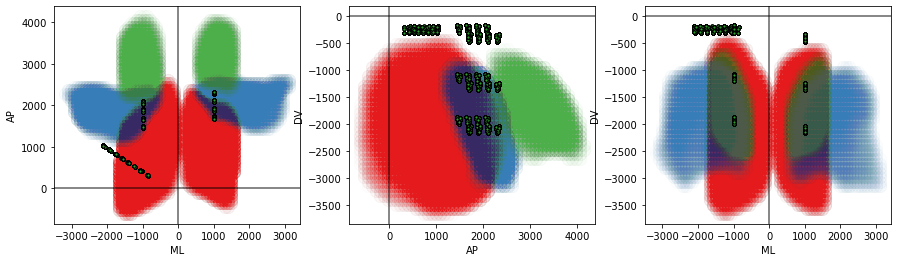

In [45]:
for bird in unit_features_with_nuclei.bird.unique():
    print(bird)
    axis_names = ["ML", "AP", "DV"]
    fig, axs = plt.subplots(ncols=3, figsize=(15,4))
    for axi, (i, j) in enumerate(tqdm([[0,1], [1,2], [0,2]])):
        ax = axs[axi]
        for region, region_voxels in um_dict.items():
            if region == "NCL":
                continue
            ax.scatter(region_voxels[:,i], region_voxels[:,j], s = 150, color = color_dict[region], alpha = 0.01)

            mask= unit_features_with_nuclei.bird == bird
            ML = unit_features_with_nuclei[mask].ML.values
            AP = unit_features_with_nuclei[mask].AP.values
            DV = unit_features_with_nuclei[mask].DV.values
            sites = np.stack([ML,AP,DV])
            ax.scatter(sites[i,:], sites[j,:], s= 10, alpha = 1, edgecolor='k')
            ax.set_xlabel(axis_names[i])
            ax.set_ylabel(axis_names[j])
            ax.axvline(0, color = 'k', alpha = 0.25)
            ax.axhline(0, color = 'k', alpha = 0.25)
    plt.show()

In [55]:
unit_features_with_nuclei[:3]

,template,presence_ratio,isi_violations_rate,max_channel,center_of_mass_x,center_of_mass_y,spike_amplitude,amp_channel_0,amp_channel_1,amp_channel_2,amp_channel_3,amp_channel_4,amp_channel_5,amp_channel_6,amp_channel_7,amp_channel_8,amp_channel_9,amp_channel_10,amp_channel_11,amp_channel_12,amp_channel_13,amp_channel_14,amp_channel_15,amp_channel_16,amp_channel_17,amp_channel_18,amp_channel_19,amp_channel_20,amp_channel_21,amp_channel_22,amp_channel_23,amp_channel_24,amp_channel_25,amp_channel_26,amp_channel_27,amp_channel_28,amp_channel_29,amp_channel_30,amp_channel_31,amp_channel_32,amp_channel_33,amp_channel_34,amp_channel_35,amp_channel_36,amp_channel_37,amp_channel_38,amp_channel_39,amp_channel_40,amp_channel_41,amp_channel_42,amp_channel_43,amp_channel_44,amp_channel_45,amp_channel_46,amp_channel_47,amp_channel_48,amp_channel_49,amp_channel_50,amp_channel_51,amp_channel_52,amp_channel_53,amp_channel_54,amp_channel_55,amp_channel_56,amp_channel_57,amp_channel_58,amp_channel_59,amp_channel_60,amp_channel_61,amp_channel_62,amp_channel_63,snrs,amplitude_cutoff,best_channel_0,best_channel_1,best_channel_2,best_channel_3,best_channel_4,best_channel_5,best_channel_6,best_channel_7,best_channel_8,best_channel_9,isi_violations_count,n_spikes,recording_id,datetime,unit,n_hours,spike_rate,good_unit,z_score_template,median_relative_channel_max,labeled_region,hemisphere,ML,AP,DV,estimated_nuclei,distance_to_estimated_nuclei,bird
0,"[[38.0, 2.0, 3.0, 9.0, 0.0, 5.0, 7.0, 1.0, 1.0...",1.0,0.016098,0,200.761180,29.686013,-1008.5,1008.5,8.0,4.0,-0.0,1.5,-0.0,-2.0,3.0,0.5,1.0,2.0,1.5,1.0,1.0,-0.0,1.0,1.0,-0.0,1.0,3.0,-0.0,1.0,-0.0,1.0,2.0,-1.0,-1.0,-0.0,2.5,2.0,2.0,3.0,-0.0,-0.0,-0.0,-0.0,4.0,-0.0,-0.0,-0.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,-0.0,7.0,0.5,-0.0,1.0,-0.0,-0.0,8.0,-0.0,-0.0,-0.0,1.0,2.0,-0.0,-0.0,-0.0,20.585960,0.007981,0,55,1,49,2,36,7,19,31,28,324,26705,exp1_rec1_dat2021-07-20_17-15-11,2021-07-20 17:15:11,0,5.590597,1.326881,True,"[[1.3555804202471096, 0.00013726999496187895, ...",0.002478,NaN,NaN,-1604.188907,1159.115348,-302.499497,NCL,207.906,B1459
1,"[[22.0, 0.0, 1.0, 11.0, 0.0, 4.0, 6.0, 3.0, 1....",1.0,0.348502,0,285.714286,44.897959,-410.0,410.0,4.0,-0.0,5.0,1.0,3.0,-0.0,2.0,-0.0,2.0,1.0,1.0,-0.0,1.0,-0.0,2.0,1.0,-0.0,1.0,2.0,-0.0,1.0,-0.0,2.0,2.0,-1.0,-0.0,3.0,3.0,2.0,-0.0,2.0,-0.0,-0.0,-0.0,-0.0,3.0,-0.0,-0.0,-0.0,2.0,-0.0,-0.0,2.0,1.0,1.0,2.0,1.0,1.0,4.0,-0.0,-0.0,1.0,1.0,-0.0,4.0,-0.0,-0.0,-0.0,-0.0,1.5,-0.0,-0.0,-0.0,8.369106,0.000173,0,3,1,49,55,5,36,28,27,24,7014,140445,exp1_rec1_dat2021-07-20_17-15-11,2021-07-20 17:15:11,1,5.590597,6.978235,True,"[[1.898381351254745, -0.20597308487571586, -0....",0.006907,NaN,NaN,-1604.188907,1159.115348,-302.499497,NCL,207.906,B1459
2,"[[21.0, 1.0, 6.0, 7.0, 1.0, 4.0, 8.0, 0.0, 0.0...",1.0,0.477637,0,610.135970,51.915946,-375.0,375.0,2.0,1.0,2.0,2.0,-0.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,-0.0,1.0,-0.0,1.0,2.0,1.0,-1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,-0.0,-0.0,-0.0,2.0,-0.0,1.0,1.0,2.0,1.0,2.0,1.0,-0.0,7.0,1.0,-0.0,-0.0,1.5,-0.0,6.0,-0.0,1.0,1.0,-0.0,2.5,1.0,1.0,-0.0,7.654670,0.000173,0,49,55,28,36,60,24,40,15,44,9613,335442,exp1_rec1_dat2021-07-20_17-15-11,2021-07-20 17:15:11,2,5.590597,16.666975,True,"[[1.6272217504225346, -0.05925896717912066, 0....",0.006098,NaN,NaN,-1604.188907,1159.115348,-302.499497,NCL,207.906,B1459


(array([11622.,  1220.,   185.,   923.,   418.,   769.,  1833.,  1016.,
         3061.,  3002.]),
 array([ 17.146 ,  75.1471, 133.1482, 191.1493, 249.1504, 307.1515,
        365.1526, 423.1537, 481.1548, 539.1559, 597.157 ]),
 <BarContainer object of 10 artists>)

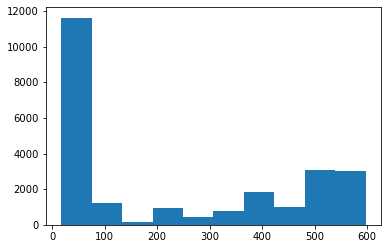

In [49]:
plt.hist(unit_features_with_nuclei.distance_to_estimated_nuclei)

In [50]:
#unit_features = pd.read_pickle(spikesorting_folder / "recording_features2.pickle")

In [51]:
len(unit_features_with_nuclei)

24049

### get unit sites acute

In [52]:
sorting_info_acute[:3]

,Bird,Sorter,Recordings sorted,Waveform stats,Events aligned,Trial-aligned spikes,Spike projections,Determine good units,timestamp,N_trials,N_playbacks,n_response,n_hours,Notes,,,,,,,,,,,,,
1,B1279,kilosort2_5,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,2021-04-12_16-27-07_289527,0,23463,0,22,,,,,,,,,,,,,,
2,B1500,kilosort2_5,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,2021-08-27_09-24-48_680961,0,9027,0,11,,,,,,,,,,,,,,
3,B1239,kilosort2,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,2021-05-17_22-18-51_557635,0,8973,0,11,,,,,,,,,,,,,,


In [54]:
for idx, sorting_row in tqdm(
    sorting_info_acute.iterrows(), total=len(sorting_info_acute), desc="sorting_row"
):
    # make sure data has been sorted
    if sorting_row['Trial-aligned spikes'] != 'TRUE':
        continue
        
    print(sorting_row.Bird)
    # get the spikesorting folder
    spikesorting_folder = (
        DATA_DIR / "spikesorting" / sorting_row.Bird / sorting_row.timestamp
    )
    unit_features_list = []

    # load recording info
    try:
        recording_df = pd.read_pickle(spikesorting_folder / "recording_df.pickle")
    except:
        print("recording_df not found for: {}".format(spikesorting_folder))
        #continue
    # get unit locations relative to sort
    try:
        unit_features = pd.read_pickle(spikesorting_folder / "recording_features.pickle")
    except:
        print("recording features not found for: {}".format(spikesorting_folder))
        #continue
    # get units that are to be merged
    # merged_units = pd.read_pickle(spikesorting_folder / "unit_clusters.pickle")

    # find matching penetrations
    bird_penetrations = penetration_sites_acute[penetration_sites_acute.Bird == sorting_row.Bird]
    
    # for each recording
    for recording_id in tqdm(
        unit_features.recording_id.unique(), desc="recording", leave=False
    ):
        recording_units = unit_features[unit_features.recording_id == recording_id]
        recording_date_str = (
            recording_df[recording_df.recording_id == recording_id].iloc[0].date_str
        )
        matching_idx = np.array(
                [
                    ### GET MATCHING TIME OF PENETRATION
                    date_str == recording_date_str
                    for date_str in bird_penetrations["date_str"].values
                ]
            )
        matching_penetrations = bird_penetrations[
            matching_idx
        ]
        
        
        if len(matching_penetrations) ==0:
            raise ValueError("no matching penetration found")
        
        # load probe info
        sorter = sorting_info_acute[sorting_info_acute.Bird == sorting_row.Bird].Sorter.iloc[0]
        sort_loc = list(
            (spikesorting_folder / "sorts" / recording_id / sorter).glob("**/sort.npz")
        )[0]
        probe = pi.io.read_prb(sort_loc.parent / "probe.prb")
        probe = probe.probes[0]
        contact_positions = probe.contact_positions

        # for each penetration in matching penetrations
        for idx, matching_penetration in matching_penetrations.iterrows():
            # get location of probe in brain
            AP = matching_penetration.AP
            ML = matching_penetration.ML
            Depth = matching_penetration.Depth
            Rotation = matching_penetration.Rotation
            Hemisphere = matching_penetration.Hemisphere

            # shift for hemisphere
            if matching_penetration.Hemisphere == "left":
                ML = -int(ML)

            penetration_units = recording_units[
                (recording_units.best_channel_0 >= int(matching_penetration.channel_min))
                & (recording_units.best_channel_0 <= int(matching_penetration.channel_max))
            ]

            penetration_channels = contact_positions[
                int(matching_penetration.channel_min) : int(
                    matching_penetration.channel_max
                )+1
            ]
            bottom_middle_loc = [
                np.mean(penetration_channels[:, 0]),
                np.min(penetration_channels[:, 1]),
            ]
            
            # 
            unit_at_max_channel_loc = True
            if unit_at_max_channel_loc:
                center_of_mass_x = [contact_positions[i,0] for i in  penetration_units.best_channel_0.values]
                center_of_mass_y = [contact_positions[i,1] for i in  penetration_units.best_channel_0.values]
            else:
                center_of_mass_x = penetration_units["center_of_mass_x"].values
                center_of_mass_y = penetration_units["center_of_mass_y"].values
            
            # get center of mass relative to centered location
            x_probe = (
                center_of_mass_x - bottom_middle_loc[0]
            )
            y_depth = (
                center_of_mass_y - bottom_middle_loc[1]
            )

            # get depth relative to y-sinus
            # get location of the surface of the brain relative to the y sinus at the penetration location
            vox_ml, vox_ap, vox_dv_y_sinus = um_to_vox(
                [int(ML), int(AP), 0],  # # ML, AP, DV
                starling_atlas.voxel_data.loc["Brain", "affine"],
                starling_atlas.um_mult,
                starling_atlas.y_sinus_um_transform,
            )
            # location in voxels
            brain_surface_at_penetration_vox = np.where(
                starling_atlas.voxel_data.loc["Brain", "voxels"][vox_ml, vox_ap]
            )[0][-1]
            # location in microns
            _, _, brain_surface_at_penetration_um = vox_to_um(
                [vox_ml, vox_ap, brain_surface_at_penetration_vox],  # # ML, AP, DV
                starling_atlas.voxel_data.loc["Brain", "affine"],
                starling_atlas.um_mult,
                starling_atlas.y_sinus_um_transform,
            )
            # subtract the location at the brain surface from depth
            DV_units = brain_surface_at_penetration_um - int(Depth) + y_depth


            # rotate
            ml_rel_probe_center, ap_rel_probe_center = rotate(
                np.vstack([x_probe, np.zeros(len(x_probe))]).T, degrees=int(Rotation)
            ).T

            ML_units = int(ML) + ml_rel_probe_center
            AP_units = int(AP) + ap_rel_probe_center

            penetration_units["labeled_region"] = matching_penetrations.Region
            penetration_units["hemisphere"] = matching_penetrations.Hemisphere
            
            penetration_units["ML"] = ML_units
            penetration_units["AP"] = AP_units
            penetration_units["DV"] = DV_units

            # estimate the nuclei and the
            all_nuclei, distances_to_nuclei = get_site_nuclei(
                ML_units,
                AP_units,
                DV_units,
                starling_atlas,
                regions_plotted,
                um_dict=um_dict,
            )

            # save to penetration units
            penetration_units["estimated_nuclei"] = all_nuclei
            penetration_units["distance_to_estimated_nuclei"] = distances_to_nuclei
            penetration_units['bird']= sorting_row.Bird
            unit_features_list.append(penetration_units)
    
    unit_features_with_nuclei = pd.concat(unit_features_list)
    #unit_features_list_all_birds.append(unit_features_with_nuclei)

    #unit_features_with_nuclei[
    #    ["AP", "DV", "ML", "estimated_nuclei", "distance_to_estimated_nuclei"]
    #]
    
    # double check everything matches
    for recording_id in tqdm(
        unit_features.recording_id.unique(), desc="recording", leave=False
    ):
        r1, r2 = np.sum(unit_features.recording_id == recording_id), np.sum(unit_features_with_nuclei.recording_id == recording_id)
        if r1 != r2:
            print(r1/r2, r1, r2, recording_id)
            raise ValueError("recording units do not match")
    
    #unit_features_with_nuclei.to_pickle(
    #    unit_features_save_loc 
    #)
    
    unit_features_with_nuclei.to_pickle(
        spikesorting_folder / "recording_features_nuclei_estimation2.pickle"
    )


sorting_row:   0%|          | 0/5 [00:00<?, ?it/s]

B1279


recording:   0%|          | 0/5 [00:00<?, ?it/s]

recording:   0%|          | 0/5 [00:00<?, ?it/s]

B1500


recording:   0%|          | 0/5 [00:00<?, ?it/s]

recording:   0%|          | 0/5 [00:00<?, ?it/s]

B1239


recording:   0%|          | 0/6 [00:00<?, ?it/s]

recording:   0%|          | 0/6 [00:00<?, ?it/s]

B1459


recording:   0%|          | 0/3 [00:00<?, ?it/s]

recording:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
unit_features[:3]